# AutoEncoder 

- 입력 데이터를 출력 층에서 그대로 복원하는 은닉층의 신경망의 파라미터를 계산하는 것
- 평가함수 : 오차 (출력층 - 입력층)


- 구성 : 입력-인코더-은닉층-디코더-출력

- 인코더 : 입력층에서 특성을 추출하는 기능
- 디코더 : 추출한 특성을 이용해서 원래의 데이터를 복원하는 기능
- 은닉층 : 입력의 데이터를 복원하기 위한 특성 파라미터를 계산 기능


- 비지도 학습에 속함 - 라벨 데이터가 필요 없음

## (1) Uncomplete AE : 입력층보다 은닉층의 크기가 작은 AE

- 손글씨 데이터를 이용한 손글씨 복원

In [2]:
from tensorflow.keras.datasets import mnist

# 데이터를 가져올 때 특성 데이터만 가져옴
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# 정규화 (0-255 -> 0.0-1.0)
# Dense층만 사용하므로 2차원 데이터를 1차원으로 변환
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [5]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
# 오토인코더 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

# Uncomplete AE에서는 퍼셉트론의 수를 32개로 설정
# 인코더
model1.add(Dense(32, input_dim=784, activation="relu"))

# 디코더
# 출력층의 수는 입력층의 수와 동일하게 설정
model1.add(Dense(784, activation="sigmoid"))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [9]:
# AE는 평가도구 loss를 사용하므로 metrics를 설정하지 않음
model1.compile(loss="binary_crossentropy",
               optimizer="adam")

In [10]:
# 입력 데이터와 출력 데이터가 동일
h1 = model1.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
235/235 [==============================] - 4s 14ms/step - loss: 0.2803 - val_loss: 0.1931
Epoch 2/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1727 - val_loss: 0.1548
Epoch 3/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1452 - val_loss: 0.1343
Epoch 4/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1288 - val_loss: 0.1213
Epoch 5/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1182 - val_loss: 0.1128
Epoch 6/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1111 - val_loss: 0.1070
Epoch 7/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1062 - val_loss: 0.1028
Epoch 8/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1025 - val_loss: 0.0998
Epoch 9/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0998 - val_loss: 0.0976
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0979 - val_lo

In [12]:
# 예측
decode1 = model1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
decode1.mean()

0.13254446

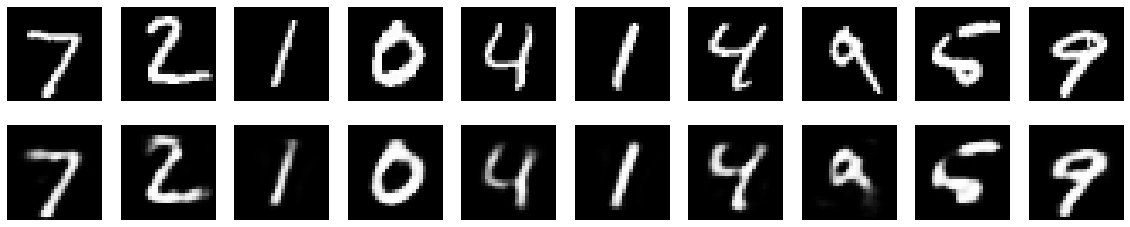

In [16]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20, 4))

for i in range(n) :
  # 원본 이미지
  # 행, 열, 출력위치
  plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode1[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

## (2) Sparse AE 
- 입력층에 L1이나 L2를 추가해서 과적합 부분을 줄여준 것

In [17]:
from tensorflow.keras import regularizers

model2 = Sequential()

# 인코더
# L1 규제를 추가
model2.add(Dense(32, input_dim=784, activation="relu",
                 activity_regularizer=regularizers.l1(10e-7)))

# 디코더
model2.add(Dense(784, activation="sigmoid"))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.compile(loss="binary_crossentropy",
               optimizer="adam")

In [19]:
h2 = model2.fit(X_train, X_train, epochs=50, batch_size=256, shuffle = True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2784 - val_loss: 0.1907
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1711 - val_loss: 0.1538
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1443 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1291 - val_loss: 0.1226
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1195 - val_loss: 0.1145
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1124 - val_loss: 0.1085
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1072 - val_loss: 0.1041
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1032 - val_loss: 0.1004
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1002 - val_loss: 0.0979
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0981 - val_lo

In [20]:
decode2 = model2.predict(X_test)

313/313 [==============================] - 1s 2ms/step


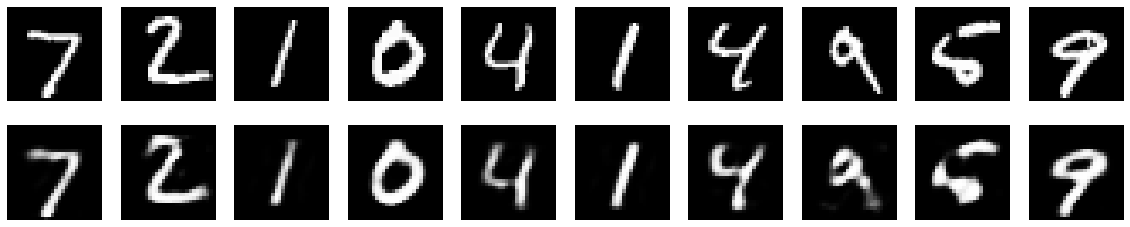

In [21]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20, 4))

for i in range(n) :
  # 원본 이미지
  # 행, 열, 출력위치
  plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode2[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

# (3) Stacked AE (Deep Fully-connected AE) 

- 은닉층을 더 많이 쌓은 것
- 인코더와 디코더는 대칭되도록 퍼셉트론 수를 맞추어야 함

In [22]:
model3 = Sequential()

# 인코더
model3.add(Dense(128, input_dim=784, activation="relu"))

# 은닉층 (인코더 쪽) - 은닉층의 퍼셉트론 수를 줄여감
model3.add(Dense(64))

model3.add(Dense(32))

# 은닉층 (디코더 쪽) - 은닉층의 페셉트론 수를 늘려감
model3.add(Dense(64))
model3.add(Dense(128))

# 디코더
model3.add(Dense(784, activation="sigmoid"))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [23]:
model3.compile(loss="binary_crossentropy", optimizer="adam")

In [24]:
h3 = model3.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
235/235 [==============================] - 5s 20ms/step - loss: 0.2077 - val_loss: 0.1413
Epoch 2/20
235/235 [==============================] - 6s 25ms/step - loss: 0.1302 - val_loss: 0.1193
Epoch 3/20
235/235 [==============================] - 7s 30ms/step - loss: 0.1169 - val_loss: 0.1114
Epoch 4/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1095 - val_loss: 0.1045
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1039 - val_loss: 0.1004
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1008 - val_loss: 0.0981
Epoch 7/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0984 - val_loss: 0.0958
Epoch 8/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0960 - val_loss: 0.0937
Epoch 9/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0942 - val_loss: 0.0921
Epoch 10/20
235/235 [==============================] - 4s 18ms/step - loss: 0.0928 - val_lo

In [25]:
decode3 = model3.predict(X_test)

313/313 [==============================] - 1s 2ms/step


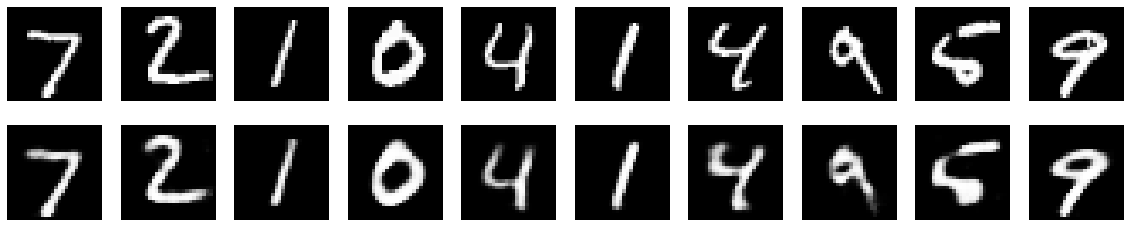

In [26]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20, 4))

for i in range(n) :
  # 원본 이미지
  # 행, 열, 출력위치
  plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode3[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

# (4) Deep Convolution AE

- CNN을 이용해서 AE를 구성한 것

- 인코더 : Conv2D, MaxPooling2D로 구성
- 디코더 : Conv2D, UpSampling2D로 구성

In [2]:
from tensorflow.keras.datasets import mnist, fashion_mnist

# 색상 차원 추가
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(10000, 28, 28, 1).astype("float32") / 255

X_train.shape, X_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

model4 = Sequential()

# 인코더
model4.add(Conv2D(16, (3, 3), padding="same", input_shape=(28, 28, 1), activation="relu"))
model4.add(MaxPooling2D((2,2)))
model4.add(Conv2D(8, (3, 3), padding="same", activation="relu"))
model4.add(MaxPooling2D((2,2)))

# 디코더
model4.add(Conv2D(8, (3, 3), padding="same", activation="relu"))
model4.add(UpSampling2D(pool_size=(2,2)))
model4.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model4.add(UpSampling2D((2,2)))
model4.add(Conv2D(1, (3, 3), padding="same", activation="sigmoid"))

model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 8)       

In [6]:
model4.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
h4 = model4.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True,
                validation_data=(X_test, X_test))

In [ ]:
decode4 = model4.predict(X_test)

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

# 출력 이미지 수
n = 10

plt.figure(figsize=(20, 4))

for i in range(n) :
  # 원본 이미지
  # 행, 열, 출력위치
  plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

  # 생성 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(decode4[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

# (5) Denosing AE

- 잡음을 제거할 목적으로 사용하는 AE

- 잡음 : 가우시안 잡음 (정규분포)을 임의로 만들어서 사용

In [3]:
import numpy as np

# 원래 이미지에 잡음 추가
noise_factor = 0.5

# normal(이산평균, 이산표준편차, 데이터수) : 정규분포의 숫자를 발생
X_train_noise = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# 범위를 벗어난 값들을 범위 안의 값으로 변환
X_train_noise = np.clip(X_train_noise, 0.0, 1.0)
X_test_noise = np.clip(X_test_noise, 0.0, 1.0)

In [6]:
X_train.shape

(60000, 28, 28, 1)

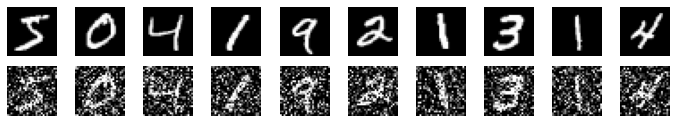

In [9]:
# 추가된 잡음 이미지 확인
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(12, 2))

for i in range(n) :
  plt.subplot(2, n, i+1)
  plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

  plt.subplot(2, n, i+1+n)
  plt.imshow(X_train_noise[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

In [13]:
# AE 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

model5 = Sequential()

# 인코더
model5.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", 
                  activation="relu", input_shape=(28, 28, 1)))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model5.add(MaxPooling2D(pool_size=(2,2)))

# 디코더
model5.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model5.add(UpSampling2D((2,2)))
model5.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model5.add(UpSampling2D((2,2)))
model5.add(Conv2D(filters=1, kernel_size=(3, 3), padding="same", activation="sigmoid"))

model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 32)      

In [14]:
model5.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
h5 = model5.fit(X_train_noise, X_train, epochs=20, batch_size=256, shuffle=True,
                validation_data=(X_test_noise, X_test))

Epoch 1/20
235/235 [==============================] - 149s 635ms/step - loss: 0.1530 - val_loss: 0.1239
Epoch 2/20
235/235 [==============================] - 151s 644ms/step - loss: 0.1201 - val_loss: 0.1144
Epoch 3/20
235/235 [==============================] - 150s 639ms/step - loss: 0.1138 - val_loss: 0.1102
Epoch 4/20
235/235 [==============================] - 150s 640ms/step - loss: 0.1104 - val_loss: 0.1080
Epoch 5/20
235/235 [==============================] - 150s 640ms/step - loss: 0.1083 - val_loss: 0.1063
Epoch 6/20
235/235 [==============================] - 149s 632ms/step - loss: 0.1067 - val_loss: 0.1053
Epoch 7/20
235/235 [==============================] - 150s 636ms/step - loss: 0.1055 - val_loss: 0.1042
Epoch 8/20
235/235 [==============================] - 165s 703ms/step - loss: 0.1044 - val_loss: 0.1033
Epoch 9/20
 45/235 [====>.........................] - ETA: 2:15 - loss: 0.1038

In [ ]:
model5.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
decode5 = model5.predict(X_test_noise)

In [ ]:
# 추가된 잡음 이미지 확인
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(12, 2))

for i in range(n) :
  # 원본 이미지
  plt.subplot(2, n, i+1)
  plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

  # 잡음 이미지
  plt.subplot(2, n, i+1+n)
  plt.imshow(X_train_noise[i].reshape(28, 28), cmap="gray")
  plt.axis("off")

  # 복원된 이미지
  plt.subplot(2, n, i+1+n*2)
  plt.imshow(decode5[i].reshape(28, 28), cmap="gray")
  plt.axis("off")